# Импорт библиотек

In [1]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
from pytesseract import Output

# Настройка пути к Tesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Загрузка изображения

In [3]:
def open(img_path):
  carplate_img = cv2.imread(img_path)  # чтение изображения
  carplate_img = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)  # конвертация изображения из BGR в RGB формат
  plt.axis('off')  # отключение осей на графике
  plt.imshow(carplate_img)  # отображение изображения
  return carplate_img

# Извлечение номера машины с использованием каскадов Хаара

In [17]:
def carplate_extract(image, carplate_haar_cascade):
    carplate_rects = carplate_haar_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=7)  # обнаружение номеров на изображении
    for x, y, w, h in carplate_rects:  # перебор прямоугольников с номерами
        carplate_img = image[y+15:y+h-10, x+15:x+w-20]  # извлечение области с номером с небольшими отступам
    return carplate_img

# Увеличение изображения для повышения качества распознавания

In [5]:
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)  # новая ширина
    height = int(image.shape[0] * scale_percent / 100)  # новая высота
    dim = (width, height)  # новые размеры
    plt.axis('off')  # отключение осей на графике
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)  # изменение размера изображения
    return resized_image

# Основаная функция программы

In [15]:
def main():
    carplate_img_rgb = open(img_path='test_img.jpg')  # загрузка изображения
    carplate_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_russian_plate_number.xml')  # загрузка каскада Хаара для номеров

    carplate_extract_img = carplate_extract(carplate_img_rgb, carplate_haar_cascade)  # извлечение номера автомобиля
    #carplate_extract_img = enlarge_img(carplate_extract_img, 120)  # увеличение изображения номера на 120%
    plt.imshow(carplate_extract_img)  # отображение увеличенного изображения номера

    carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)  # конвертация изображения в оттенки серого
    plt.axis('off')  # отключение осей на графике
    plt.imshow(carplate_extract_img_gray, cmap='gray')  # отображение серого изображения номера

    print('Номер авто: ', pytesseract.image_to_string(
        carplate_extract_img_gray,
        config='--psm 6 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    )  # распознавание и вывод текста номера с изображения

Номер авто:  AINAAA460
P030CP120



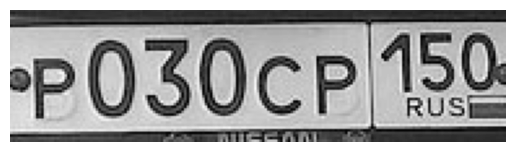

In [18]:
# Запуск основной функции программы
if __name__ == "__main__":
    main()